In [9]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from add_drive_cost import *

warnings.filterwarnings("ignore")


rd = pd.read_csv('rides_final.csv', sep=',', skipinitialspace=True, encoding='utf-8')

In [10]:
df['drive_dur'] = df.apply(lambda row: get_dur(*row[['start_date', 'end_date']]), axis=1)
df['drive_cost'] = df.apply(lambda row: get_cost(*row[['start_date', 'drive_dur', 'promo']]), axis=1)

In [11]:
print(df[df['promo'] == 1].shape)

(2006, 14)


Видим, что всего промокод был использован в 2006 поездках. 
Можем посчитать, что на бесплатном старте мы потеряли 2006 * 30 = 60180 рублей

In [12]:
print(df[df['promo'] == 1]['drive_cost'].sum())

194396


Несмотря на бесплатный старт мы все равно получили 194396 рублей выручки.


Таким образом с данных поездок мы извлекли 194396 - 60180 = 134216 рублей чистой прибыли

<Axes: >

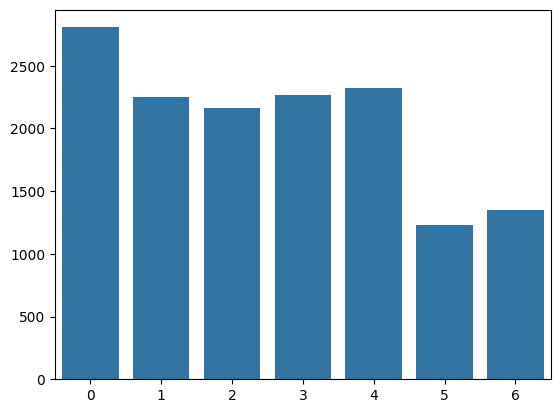

In [19]:
def get_weekday(date_str: str):
    return dt.datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S').weekday()


def check(date_str: str):
    date = dt.datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
    return 6 <= date.hour <= 9


df_morning = df[df['start_date'].apply(check)]
weekday = df_morning['start_date'].apply(get_weekday)
weekdays_cnt = [len(df_morning[weekday == wd]) for wd in range(7)]
sns.barplot(weekdays_cnt)

Видим, что по понедельникам с 6 до 10 утра трафик действительно выше, чем в другие дни